In [1]:
import sys
import os 

# loads in the parent folder directory
sys.path.append(os.path.abspath("../"))
from src.bts import *


/Users/gabrielhaw/Desktop/timeseries/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 1. Load cached dataset
path = kagglehub.dataset_download(
    "thedevastator/240000-household-electricity-consumption-records"
)

In [3]:
# 2. create an instance (can apply none, daily, hourly average)
instance = EnergyConsumption(
    csv_path=os.path.join(path, "household_power_consumption.csv"),
    time='daily' 
)

# 3. load and preprocess data
instance.preproc()

/Users/gabrielhaw/Desktop/timeseries/src/bts.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


In [4]:
# 4. pre normavisualize (menu)
instance.datavis()
# instance.datavis(plot='line')


=== Visualisation Menu ===
pairplot   - Pairplot → see relationships between features (sampled).
hist       - Histogram → check skewness + heavy tails.
kde        - KDE → smooth distribution shape.
box        - Boxplot → detect outliers + variable spread.
qq         - QQ Plot → shows if data is normally distributed.
line       - Line plot → view how each variable changes over time.
menu       - Options: pairplot, hist, kde, box, qq, line


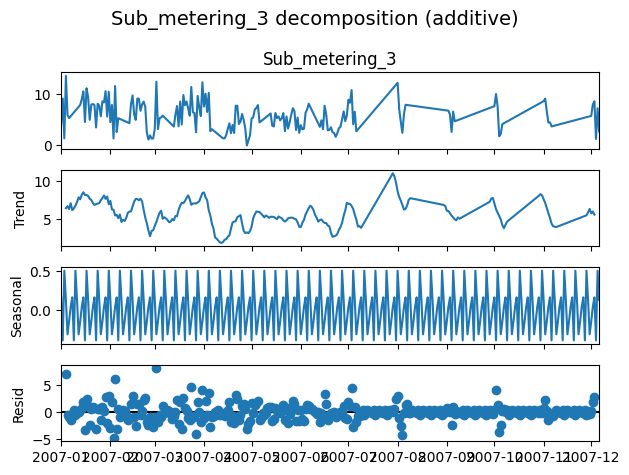

In [5]:
# stationarity test for time series data 
instance.seasonal(variable='Sub_metering_3', model='additive', period=7) 